In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import open_file, make_str
import networkx as nx
import math
from networkx import path_graph, random_layout
from pylab import rcParams
rcParams['figure.figsize'] = 7,5

In [ ]:
edges = pd.read_csv('/content/drive/My Drive/Colab Notebooks/elliptic_txs_edgelist.csv')
classes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elliptic_txs_classes.csv')
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elliptic_txs_features.csv')

In [ ]:
classes = classes.replace("unknown","3")
classes["Time step"]=features[["1"]]
classes=classes.loc[classes['class'].isin(["1","2"])]
classes["class"].replace({"1": 1, "2": 2}, inplace=True)

In [ ]:
X = edges
X = X.to_numpy()

In [ ]:
n, m = X.shape
# n = n*0.0001
n = math.ceil(n)
f = 2
X = X[:n,:f]

In [ ]:
#Convert edgelist to networkx
G = nx.DiGraph()
G.add_edges_from(X)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 203769
Number of edges: 234355
Average in degree:   1.1501
Average out degree:   1.1501


In [ ]:
groups = classes.groupby(["Time step"])

In [ ]:
selected_nodes = groups.get_group(1)

In [ ]:
classes.dtypes

txId           int64
class          int64
Time step    float64
dtype: object

ilicit_edges  (13, 2)
ilicit_ids  (18,)
Name: 
Type: DiGraph
Number of nodes: 22
Number of edges: 13
Average in degree:   0.5909
Average out degree:   0.5909


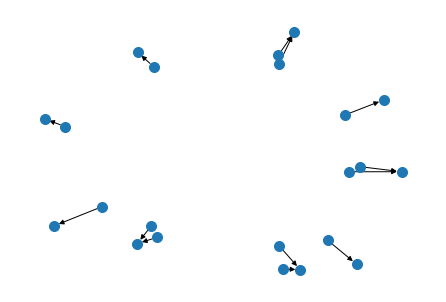

<Figure size 2160x2160 with 0 Axes>

In [ ]:
#Plot groups of illicit transactions in each timestep
ilicit_ids = classes.loc[(classes['Time step'] == 2)  & (classes['class'] == 1) , 'txId']
ilicit_edges = edges.loc[edges['txId1'].isin(ilicit_ids) ]
print("ilicit_edges ",ilicit_edges.shape)
print("ilicit_ids ",ilicit_ids.shape)
graph = nx.from_pandas_edgelist(ilicit_edges,  source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
print(nx.info(graph))
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False,pos=pos,node_size=100)
plt.figure(3,figsize=(30,30))
plt.show()

In [ ]:
H = G.subgraph(selected_nodes['txId'])
# nx.draw_spectral(H,with_labels = False,node_size=3)
plt.show()

In [ ]:
nodes = G.number_of_nodes()
deg = sum(d for n, d in G.degree()) / float(nodes)
print("Average Degree: ", deg)


Average Degree:  2.3002026804862368


In [ ]:
#plot Degree vs Number of Nodes
def plot_def_dist(G):
  all_degress = [v for k, v in G.degree()]
  # print(all_degress)
  unique_degrees = list(set(all_degress))
  count_of_degrees = []
  for i in unique_degrees:
    x = all_degress.count(i)
    count_of_degrees.append(x)
  # print(unique_degrees)
  plt.plot(unique_degrees, count_of_degrees,'bo')
  plt.xlabel('Degree')
  plt.ylabel('Number of Nodes')
  plt.show()

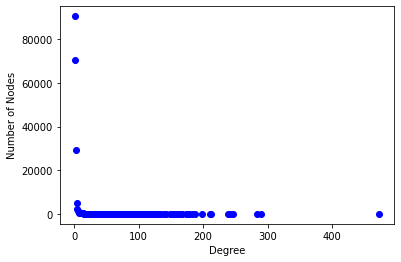

In [ ]:
plot_def_dist(G)

In [ ]:
nx.density(G)

5.644170528459417e-06

In [ ]:
nx.average_clustering(G) 

0.006881095362122399